# Census Income Prediction 

## Introduction About the Data

Prediction task is to determine whether a person makes over 50K a year. (Classification problem)

There are 14 Independent Variables.
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct,Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Target Varibale:
- income: >50K, <=50K.

Dataset Source Link : https://archive.ics.uci.edu/ml/datasets/census+income

In [2]:
#Importing Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Reading the Dataset using pandas

df = pd.read_csv('data/census_income.csv')

In [4]:
#Reading first five rows using Head

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
#Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#Duplicates
df.duplicated().sum()

24

In [7]:
#Drop Duplicates
df.drop_duplicates(keep='first',inplace=True)

In [8]:
#shape of dataset
df.shape

(32537, 15)

#### Observation:
- There are 32537 rows and 15 columns in the dataset
- Numerical -> 6 and categorical -> 9

In [9]:
#check Nan values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

#### Observation:
- '?' seems to be NAN Values

In [10]:
#Replacing ? to NAn value

df.replace('?',np.nan, inplace=True)

<Axes: >

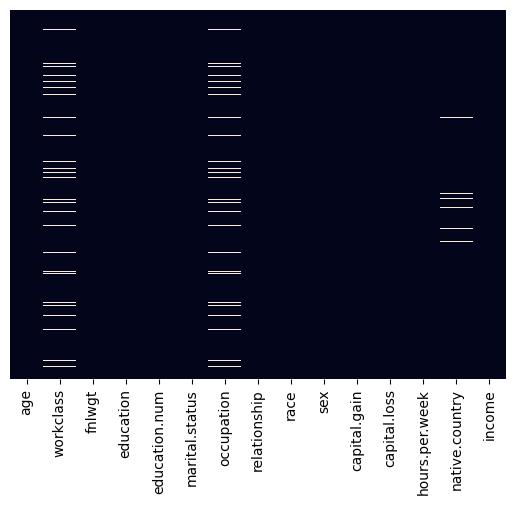

In [11]:
#checking nan values using heatmap

sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

#### Observation 
- Workclass,occupation and native country has missing values

### Categorical faetures

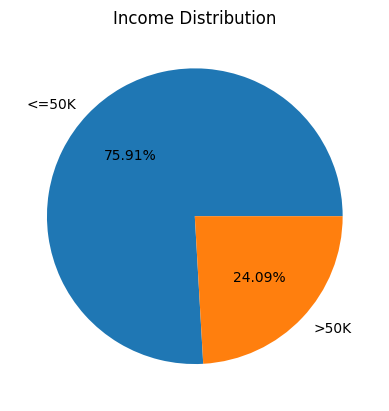

In [12]:
#Distribution of target variable -> Income
income = df['income'].value_counts()

plt.title('Income Distribution')
plt.pie(income,labels=income.index,autopct='%1.2f%%')
plt.show()

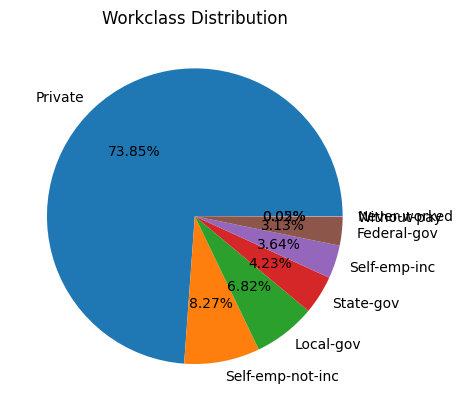

In [13]:
#Distribution of Work class column
workclass = df['workclass'].value_counts()


#plt.figure(figsize=(8,8))
plt.pie(workclass,labels=workclass.index,autopct='%1.2f%%')
plt.title('Workclass Distribution')
plt.show()

In [14]:
#Realtionship between workclass and Income column

workclass = df.groupby('workclass')['income']
workclass.value_counts()

workclass         income
Federal-gov       <=50K       589
                  >50K        371
Local-gov         <=50K      1476
                  >50K        617
Never-worked      <=50K         7
Private           <=50K     17712
                  >50K       4961
Self-emp-inc      >50K        622
                  <=50K       494
Self-emp-not-inc  <=50K      1816
                  >50K        724
State-gov         <=50K       945
                  >50K        353
Without-pay       <=50K        14
Name: count, dtype: int64

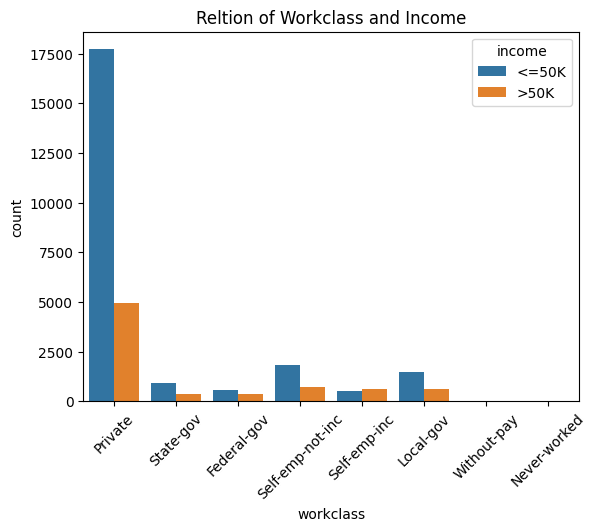

In [15]:
sns.countplot(df,x='workclass',hue='income')
plt.title('Reltion of Workclass and Income')
plt.xticks(rotation=45
           )
plt.show()

#### Observation:
- Most people Work in the Private sector.
- In every sector(except self-emp-inc),Number of people earns <=50k are more than the Number of people who earns >50k.

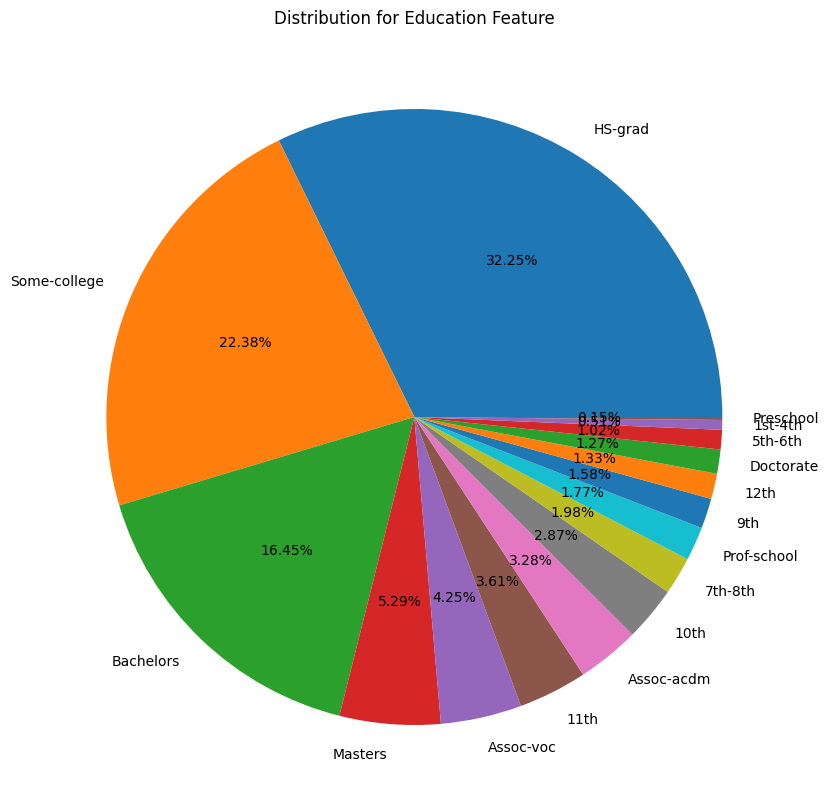

In [16]:
#Distribution for Education Feature

edu = df['education'].value_counts()
plt.figure(figsize=(15,10))
plt.pie(edu , labels=edu.index , autopct='%1.2f%%')
plt.title('Distribution for Education Feature')
plt.show()

In [17]:
# Relationship between education and income feature

edu_income = df.groupby('education')['income']
edu_income.value_counts()

education     income
10th          <=50K      871
              >50K        62
11th          <=50K     1115
              >50K        60
12th          <=50K      400
              >50K        33
1st-4th       <=50K      160
              >50K         6
5th-6th       <=50K      316
              >50K        16
7th-8th       <=50K      605
              >50K        40
9th           <=50K      487
              >50K        27
Assoc-acdm    <=50K      802
              >50K       265
Assoc-voc     <=50K     1021
              >50K       361
Bachelors     <=50K     3132
              >50K      2221
Doctorate     >50K       306
              <=50K      107
HS-grad       <=50K     8820
              >50K      1674
Masters       >50K       959
              <=50K      763
Preschool     <=50K       50
Prof-school   >50K       423
              <=50K      153
Some-college  <=50K     5896
              >50K      1386
Name: count, dtype: int64

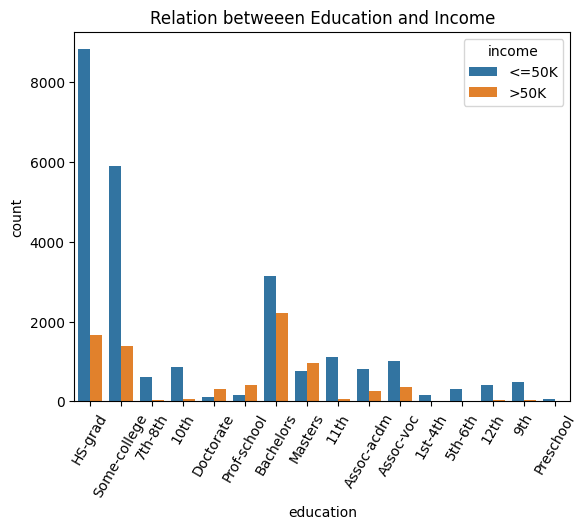

In [18]:
sns.countplot(df , x='education',hue='income')
plt.title('Relation betweeen Education and Income')
plt.xticks(rotation=60)
plt.show()

#### Observation:
- In Doctorate,Masters,Prof-school - Number of people with income >50k is more than the Number of people who income <=50k.


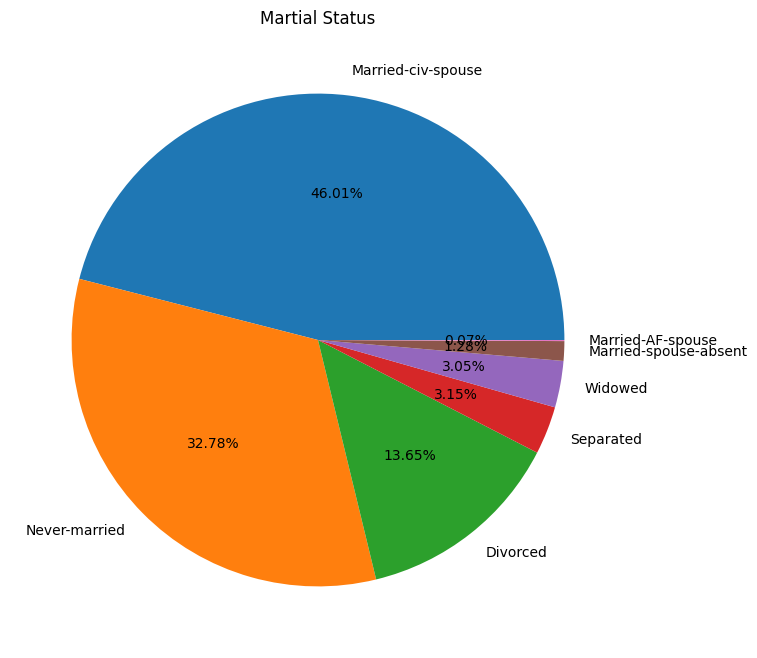

In [19]:
#Distribution for Martial status feature

martial = df['marital.status'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(martial,labels=martial.index,autopct='%1.2f%%')
plt.title('Martial Status')
plt.show()

In [20]:
#Realtionship Between Martial status and Income
martial_income = df.groupby('marital.status')['income']
martial_income.value_counts()

marital.status         income
Divorced               <=50K      3978
                       >50K        463
Married-AF-spouse      <=50K        13
                       >50K         10
Married-civ-spouse     <=50K      8280
                       >50K       6690
Married-spouse-absent  <=50K       384
                       >50K         34
Never-married          <=50K     10176
                       >50K        491
Separated              <=50K       959
                       >50K         66
Widowed                <=50K       908
                       >50K         85
Name: count, dtype: int64

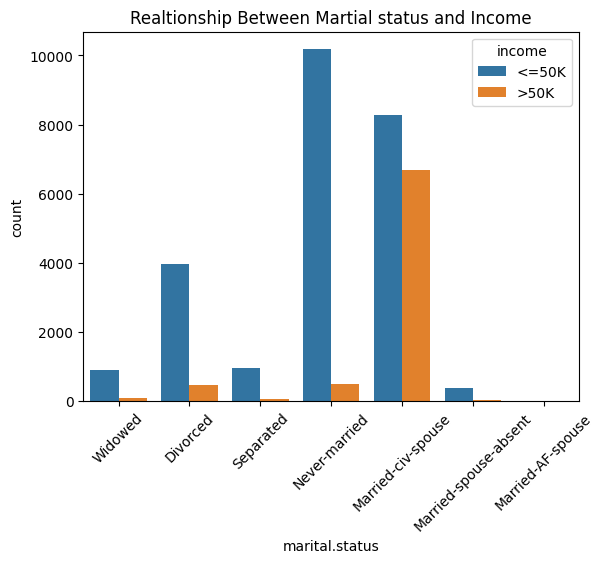

In [21]:
sns.countplot(df,x='marital.status',hue='income')
plt.title('Realtionship Between Martial status and Income')
plt.xticks(rotation=45)
plt.show()

#### Obseravtion:
- Most people earning >50k are Married-civ-spouse.
- Most people earning <=50k are Never-married.
- Diff bt two income groups is very high for Never-married

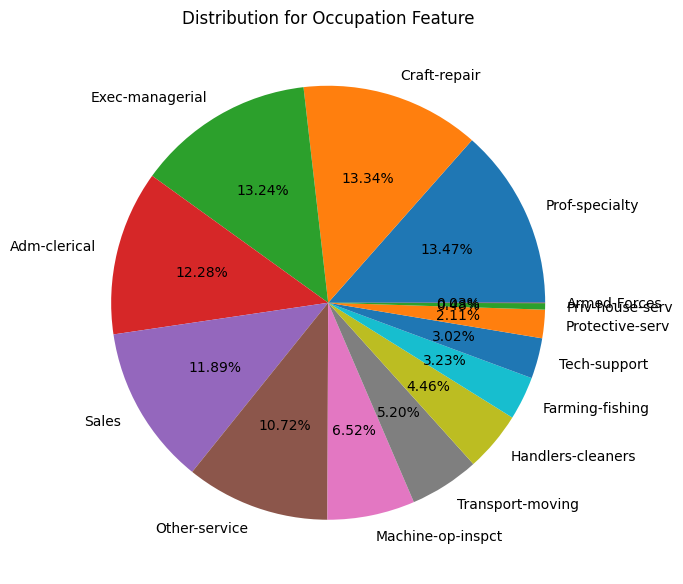

In [22]:
# Distribution for Occupation Feature

occp = df['occupation'].value_counts()

plt.figure(figsize=(7,10))
plt.pie(occp,labels=occp.index,autopct='%1.2f%%')
plt.title('Distribution for Occupation Feature')
plt.show()

In [23]:
#Realtionship Between Occupation and Income
ocup_income = df.groupby('occupation')['income']
ocup_income.value_counts()

occupation         income
Adm-clerical       <=50K     3261
                   >50K       507
Armed-Forces       <=50K        8
                   >50K         1
Craft-repair       <=50K     3165
                   >50K       929
Exec-managerial    <=50K     2097
                   >50K      1968
Farming-fishing    <=50K      877
                   >50K       115
Handlers-cleaners  <=50K     1283
                   >50K        86
Machine-op-inspct  <=50K     1751
                   >50K       249
Other-service      <=50K     3154
                   >50K       137
Priv-house-serv    <=50K      146
                   >50K         1
Prof-specialty     <=50K     2278
                   >50K      1858
Protective-serv    <=50K      438
                   >50K       211
Sales              <=50K     2667
                   >50K       983
Tech-support       <=50K      644
                   >50K       283
Transport-moving   <=50K     1277
                   >50K       320
Name: count, dtype: in

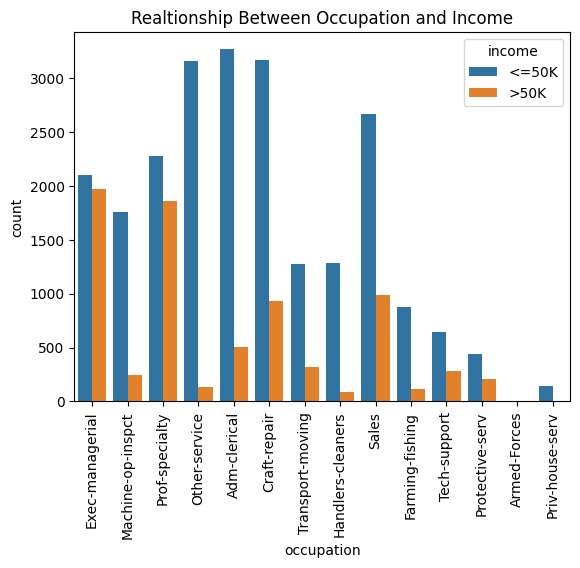

In [24]:
sns.countplot(df,x='occupation',hue='income')
plt.title('Realtionship Between Occupation and Income')
plt.xticks(rotation=90)
plt.show()

#### Obseravtion:
- More people are earning >50k in Exec-managerial and Prof-speciality than other groups

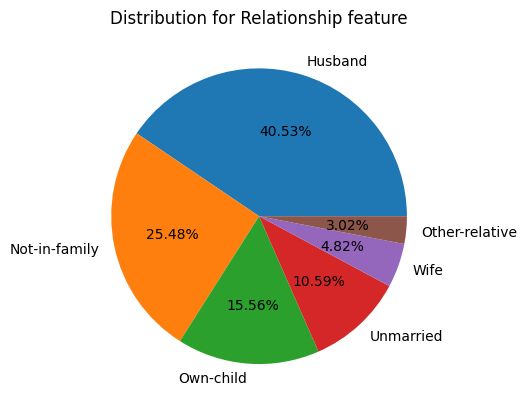

In [25]:
#Distribution for Relationship feature
relation = df['relationship'].value_counts()

plt.pie(relation,labels=relation.index,autopct='%1.2f%%')
plt.title('Distribution for Relationship feature')
plt.show()

In [26]:
# Realtion between Realtionship and Income Feature
relation_income = df.groupby('relationship')['income']
relation_income.value_counts()

relationship    income
Husband         <=50K     7271
                >50K      5916
Not-in-family   <=50K     7436
                >50K       856
Other-relative  <=50K      944
                >50K        37
Own-child       <=50K     4997
                >50K        67
Unmarried       <=50K     3227
                >50K       218
Wife            <=50K      823
                >50K       745
Name: count, dtype: int64

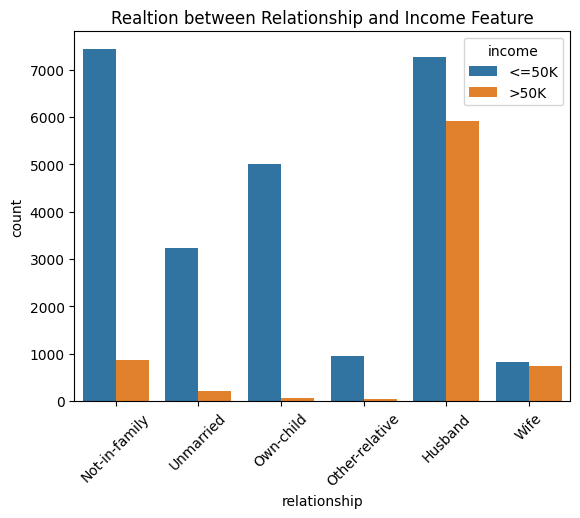

In [27]:
sns.countplot(df,x='relationship',hue='income')
plt.title('Realtion between Relationship and Income Feature')
plt.xticks(rotation=45)
plt.show()

#### Obseravtion:
- In realtionship pie chart, 40.5% are Husbands.
- Husbands are more likely to earn >50k than others.  

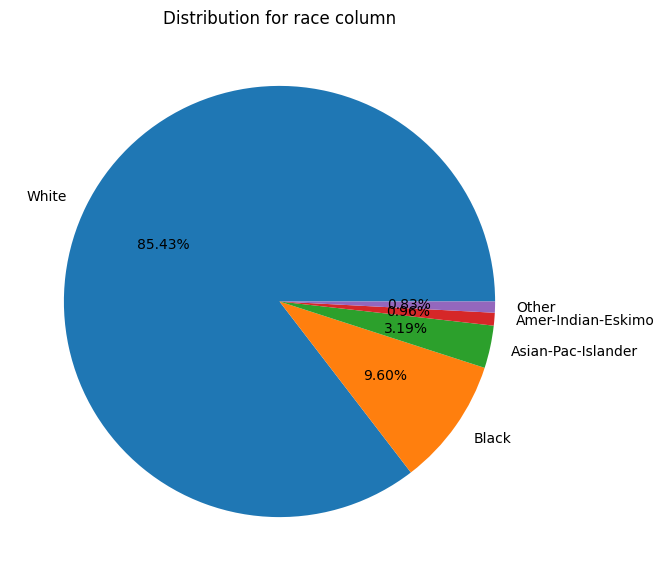

In [28]:
#Distribution for race column

race = df['race'].value_counts()

plt.figure(figsize=(9,7))
plt.pie(race,labels=race.index,autopct='%1.2f%%')
plt.title('Distribution for race column')
plt.show()

In [29]:
#Realtionship between race and Income

race_income = df.groupby('race')['income']
race_income.value_counts()

race                income
Amer-Indian-Eskimo  <=50K       275
                    >50K         36
Asian-Pac-Islander  <=50K       762
                    >50K        276
Black               <=50K      2735
                    >50K        387
Other               <=50K       246
                    >50K         25
White               <=50K     20680
                    >50K       7115
Name: count, dtype: int64

<Axes: xlabel='race', ylabel='count'>

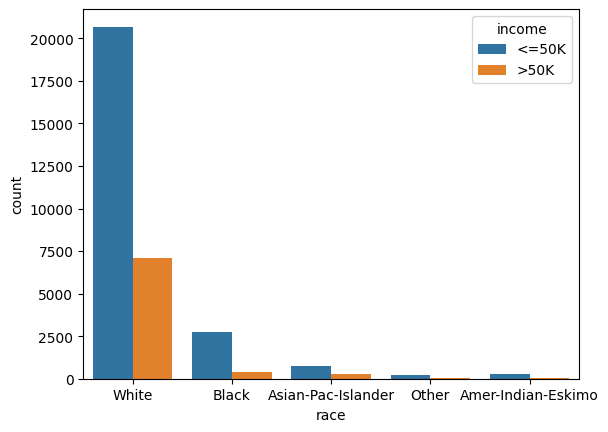

In [30]:
sns.countplot(df,x='race',hue='income')

#### Obseravtion:
- In race column, Maximum people are white
- White peple are more likely to earn >50k

In [31]:
df.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K


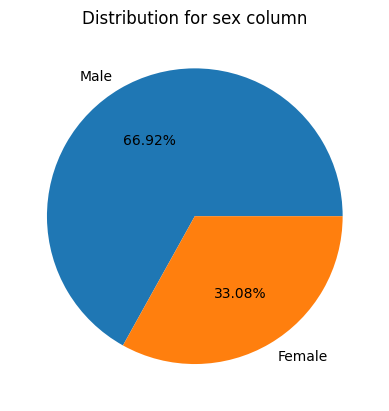

In [32]:
#Distribution for sex column

sex = df['sex'].value_counts()

plt.pie(sex,labels=sex.index,autopct='%1.2f%%')
plt.title('Distribution for sex column')
plt.show()

In [33]:
#Realtionship between sex and Income

sex_income = df.groupby('sex')['income']
sex_income.value_counts()

sex     income
Female  <=50K      9583
        >50K       1179
Male    <=50K     15115
        >50K       6660
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

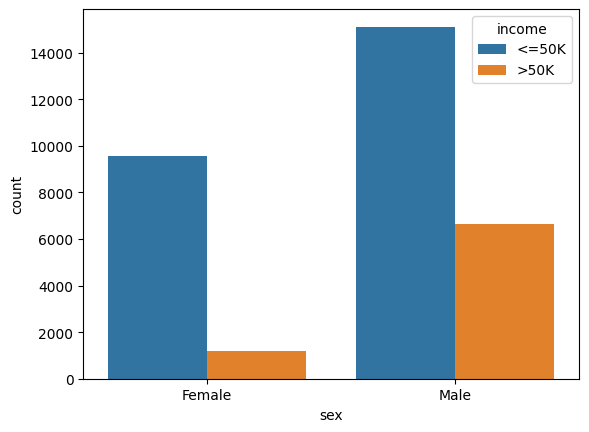

In [34]:
sns.countplot(df,x='sex',hue='income')

#### Obseravtion:
- In sex column, More are Male(66.92%) than female(33.1%).
- Males are more likely to earn >50k than females.

In [35]:
# Unique values in native-Country feature

df['native.country'].nunique()

41

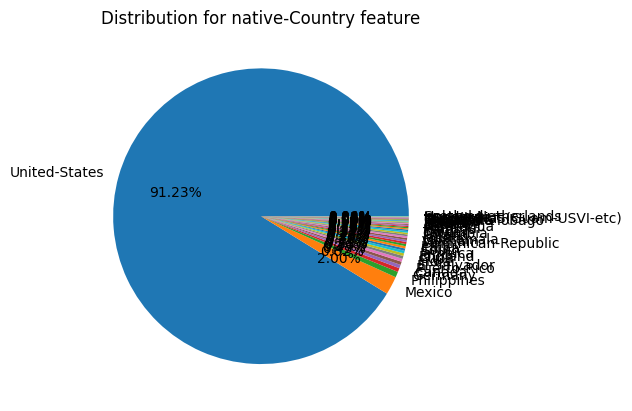

In [36]:
# Distribution for native-Country feature
native = df['native.country'].value_counts()

plt.pie(native,labels=native.index,autopct='%1.2f%%')
plt.title('Distribution for native-Country feature')
plt.show()

In [37]:
#Realtionship between Native country and Income feature

sex_income = df.groupby('native.country')['income']
sex_income.value_counts()

native.country  income
Cambodia        <=50K       12
                >50K         7
Canada          <=50K       82
                >50K        39
China           <=50K       55
                          ... 
United-States   >50K      7169
Vietnam         <=50K       62
                >50K         5
Yugoslavia      <=50K       10
                >50K         6
Name: count, Length: 80, dtype: int64

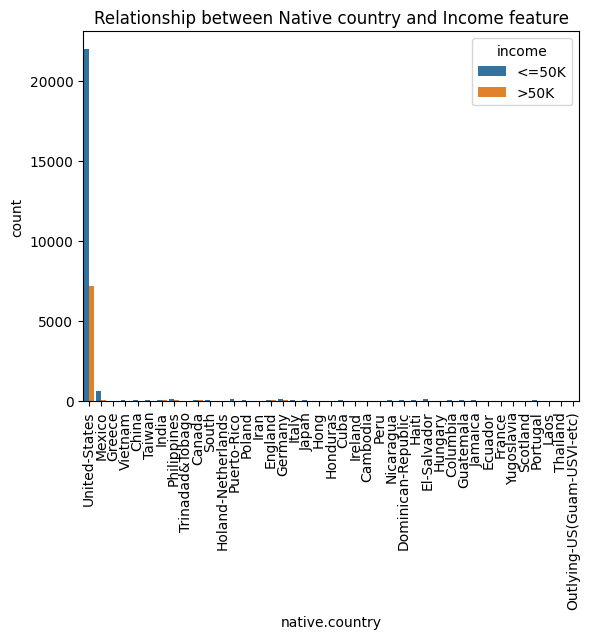

In [38]:
sns.countplot(df,x='native.country',hue='income')
plt.title('Relationship between Native country and Income feature')
plt.xticks(rotation=90)
plt.show()

#### Observation:
- Total 41 unique contries are present
- Most datapoints(91.23%) are from united states

### Numerical features

In [39]:
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
print(numerical_features)

['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


In [40]:
df[numerical_features].head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40


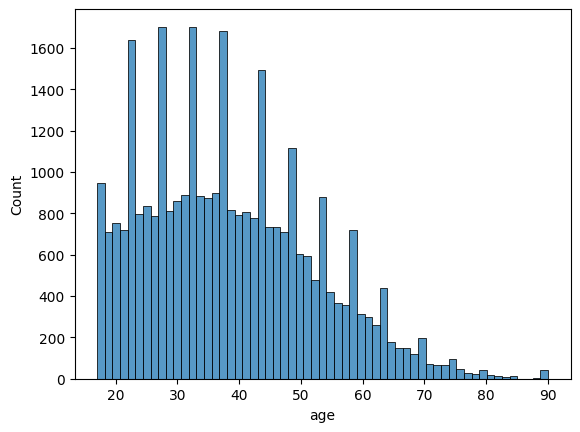

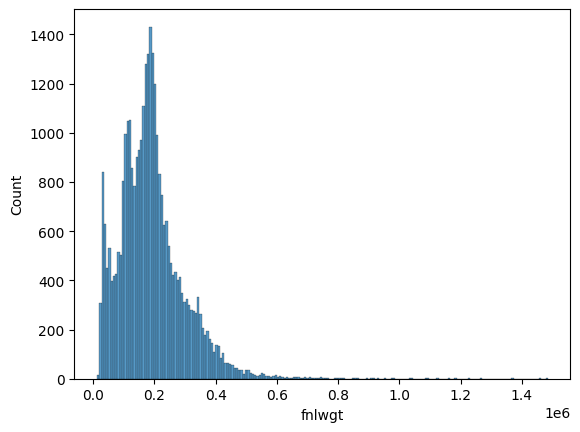

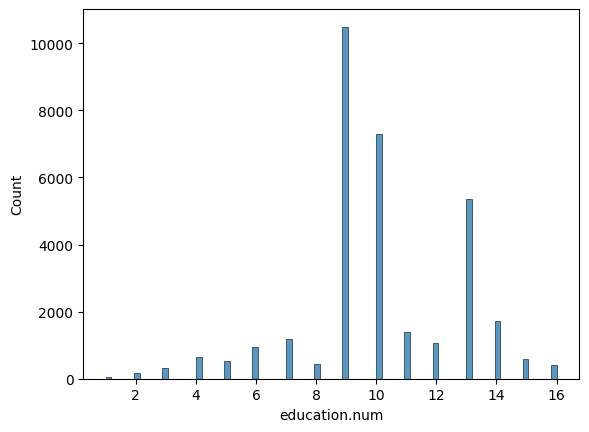

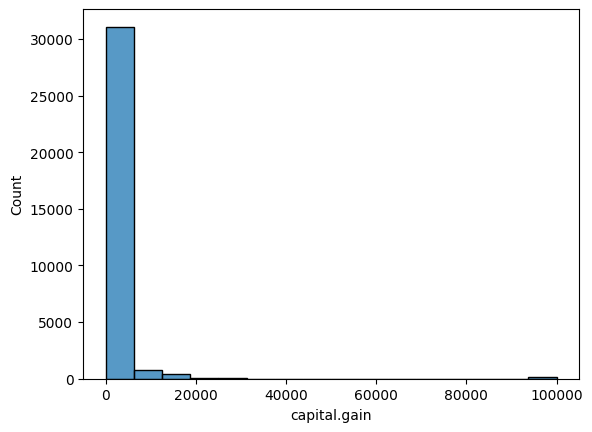

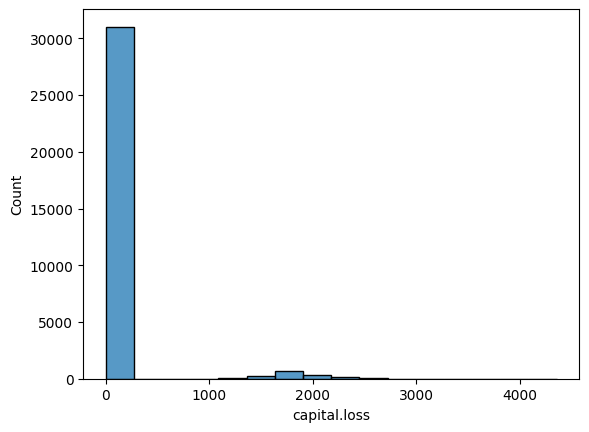

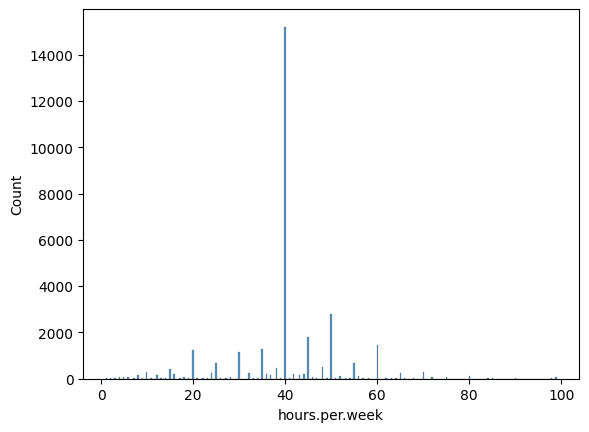

In [41]:
## Distribution of Numerical features
# Univariate Analysis

for feature in numerical_features:
   sns.histplot(df,x=feature)
   plt.show()

#### Observation:
- The Age column is slightly right skewed or positively skewed.
- Capital gain and Capital loss are mostly 0.
- In 'Hours-per-week, most data points are concentratred on 40.

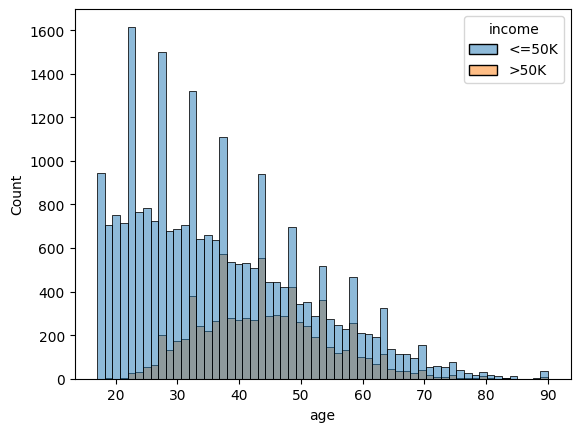

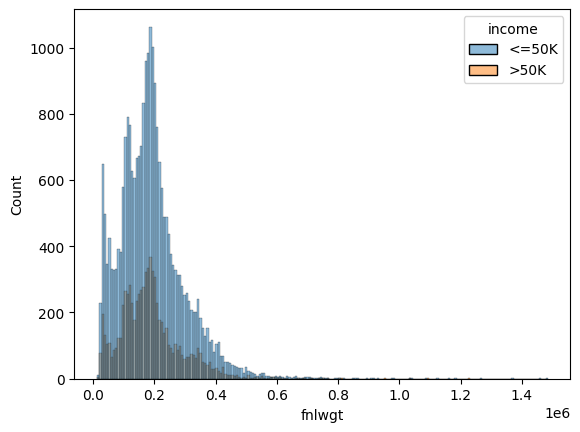

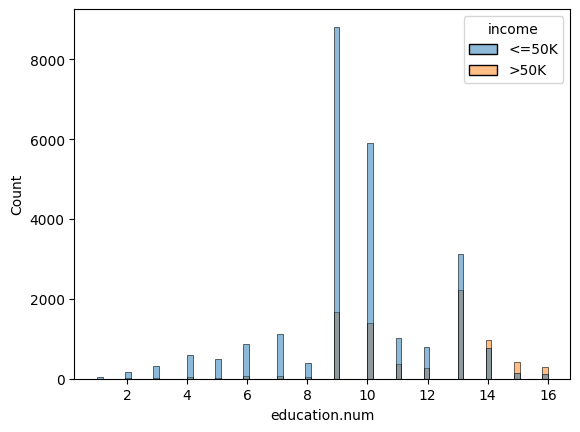

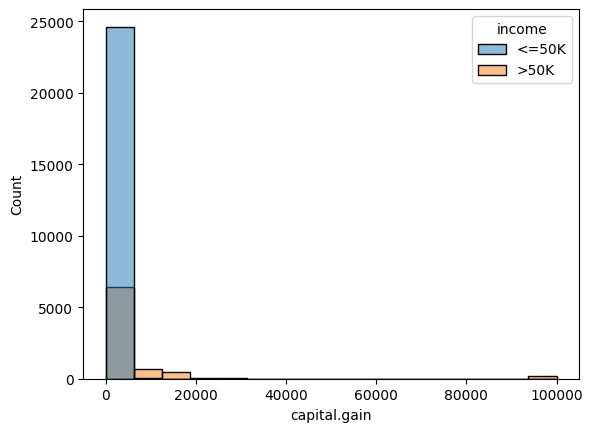

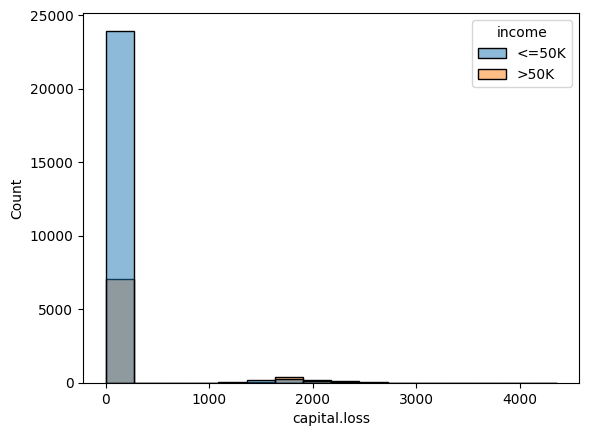

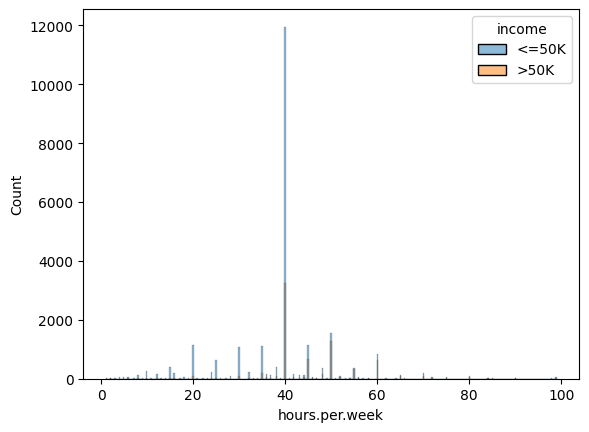

In [42]:
## Realtion between Numerical features and Income feature
# Bivariate Analysis

for feature in numerical_features:
   sns.histplot(df,x=feature,hue='income')
   plt.show()

#### Observation:
- In Age column, most of the people earn >50k follows a different distribution than overall 'age' column distribution
- People with higher education are earning more income.
- More the Capital-gain, More the income(>50k).

In [43]:
# Hours per week cross tabulation

hour_per_week = pd.crosstab(df['hours.per.week'], df['income'],normalize='index')
print(hour_per_week)

income             <=50K      >50K
hours.per.week                    
1               0.900000  0.100000
2               0.750000  0.250000
3               0.974359  0.025641
4               0.944444  0.055556
5               0.883333  0.116667
...                  ...       ...
95              0.500000  0.500000
96              0.800000  0.200000
97              0.500000  0.500000
98              0.727273  0.272727
99              0.705882  0.294118

[94 rows x 2 columns]


<Axes: xlabel='hours.per.week'>

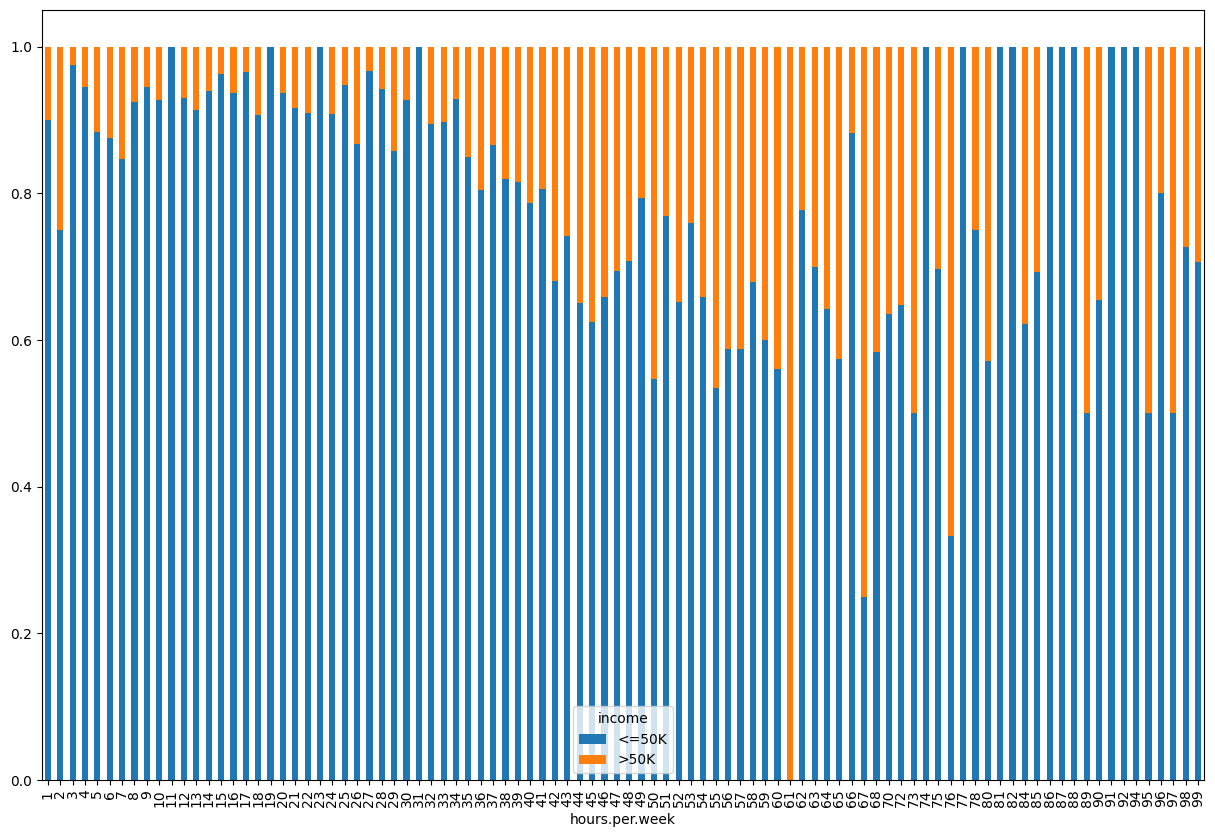

In [44]:
hour_per_week.plot(kind='bar',figsize=(15,10),stacked=True)

#### Observation:
- Longer working hour does not mean higher income

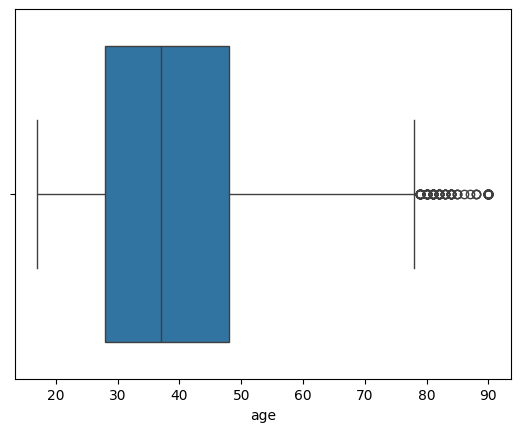

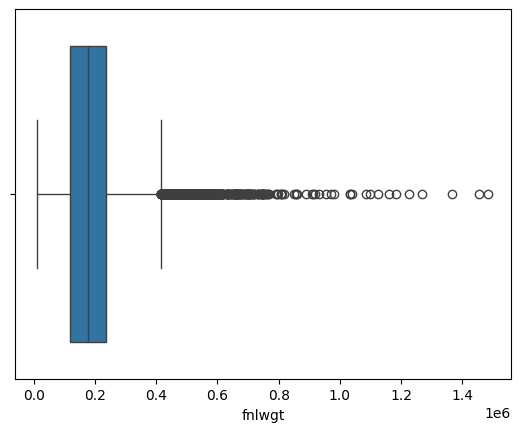

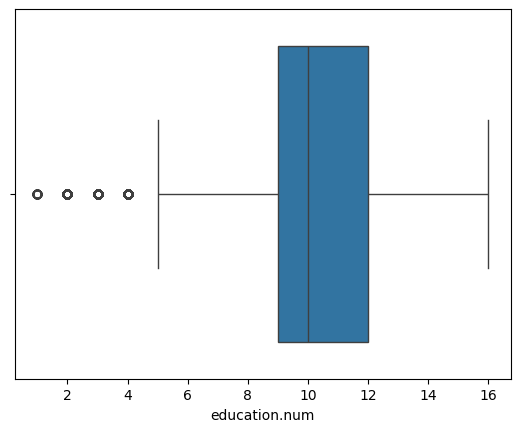

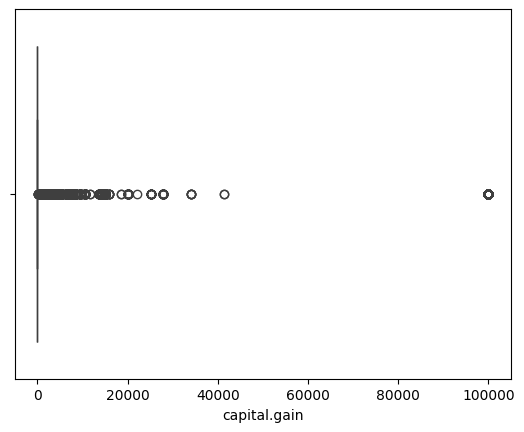

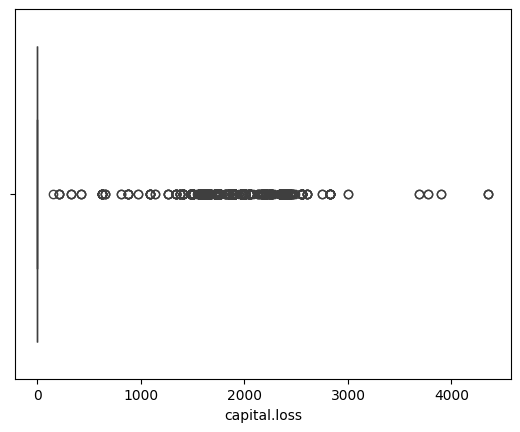

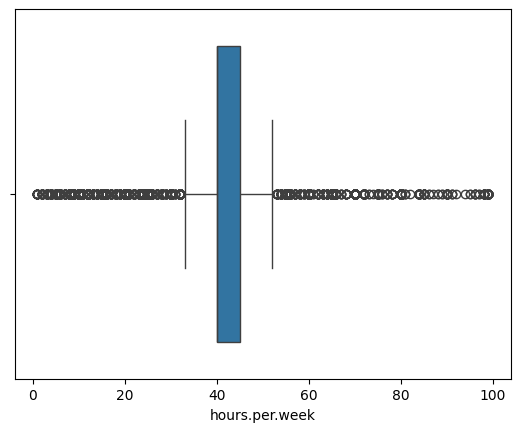

In [45]:
# Checking Outliers
for feature in numerical_features:
   sns.boxplot(x=df[feature])
   plt.show()


#### Observation:
- There are outliers in all numerical features

## Feature Engineering

In [46]:
# Handling target variable Income

income_map = {'<=50K':0, '>50K':1}

df['income'] = df['income'].map(income_map)

In [47]:
df.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0


In [48]:
#Fixing Missing values

df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64

In [49]:
col_with_nan = ['workclass','occupation','native.country']

for col in col_with_nan:
   df[col].fillna(df[col].mode()[0],inplace=True)

In [50]:
df['income']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32537, dtype: int64

In [51]:
def white_space_remover(dataframe):
   for i in dataframe.columns:
      if dataframe[i].dtype == 'O':
         dataframe[i] = dataframe[i].map(str.strip)
      else:
         pass
white_space_remover(df)

In [52]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


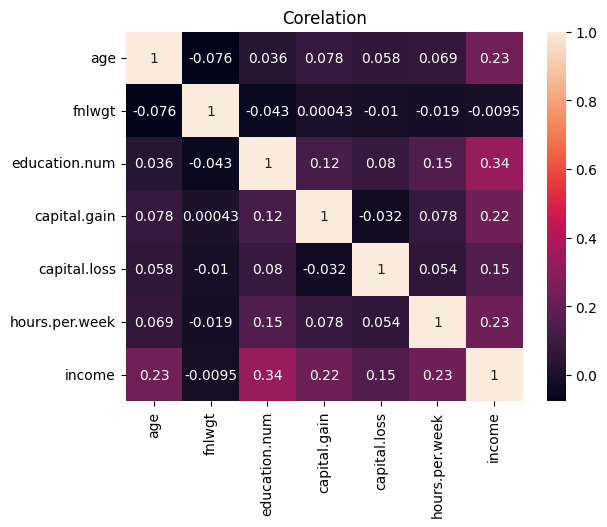

In [56]:
#Corelation

sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title('Corelation')
plt.show()

In [57]:
df.drop(labels=['fnlwgt','capital.loss'],axis=1,inplace=True)

In [58]:
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,hours.per.week,native.country,income
0,90,Private,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,40,United-States,0
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,18,United-States,0
2,66,Private,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,40,United-States,0
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,40,United-States,0
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,40,United-States,0
